In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = './cat_boost/'
filePattern = 'cat_boost'
nFiles = 15
preds = []

In [3]:
for i in range(nFiles):
    file = pd.read_csv(path + filePattern + str(i) + '.csv')
    preds.append(file['CustomerInterest'].values)

In [14]:
power = 0.5

power_preds = np.power(preds, power)
mean_pow_pred = np.sum(power_preds, axis=0) / nFiles

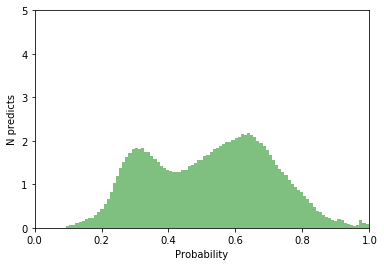

In [15]:
num_bins = 100
n, bins, patches = plt.hist(mean_pow_pred, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.xlabel('Probability')
plt.ylabel('N predicts')
plt.ylim([0,5])
plt.xlim([0,1])
plt.show()

In [7]:
sub_file = pd.read_csv(path + 'sample_submission.csv')
sub_file['CustomerInterest'] = mean_pow_pred
sub_file.to_csv(path + filePattern + str(nFiles) + '_pow_' + str(power) + '.csv', index=False)